<center>
<img src="logo.png" height="900"> 
</center>


#  Простые симуляции

В этом задании мы решим несколько простых задачек на симуляции. 

In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

## Упражнение 1 (распределение Пуассона)

Случайная величина $X$ имеет распределение Пуассона с $\lambda = 2$,  $X \sim Pois(2)$. С помощью $10^6$ симуляций оцените: 

* $P(X > 6)$
* $P(X > 6 \mid X > 5)$
* $P(X > 5, X < 7)$
* $E(X^3)$ 
* $E(X \mid X > 5)$

Вбейте получившиеся ответы в переменные `ans1`, `ans2`, $\ldots$, `ans5`. 

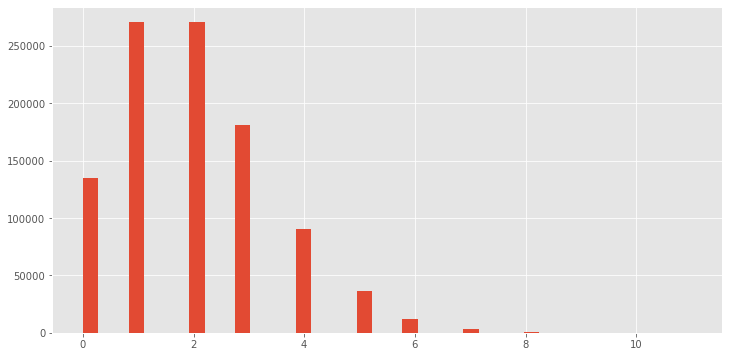

In [2]:
dist = sts.poisson(2)

sample = dist.rvs(10**6)
plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('ggplot')
plt.hist(sample, bins=40);

In [3]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

ans1 = (sample > 6).mean()
ans2 = (sample[sample > 5] > 6).mean()
ans3 = ((sample > 5) & (sample < 7)).mean()
ans4 = (sample ** 3).mean()
ans5 = (sample[sample > 5]).mean()

# your code here
ans1, ans2, ans3, ans4, ans5

(0.004606, 0.2782577176342657, 0.011947, 22.020606, 6.3605992871382835)

In [4]:
# проверка, что задание решено корректно
assert np.abs(ans3 - 0.01) < 1e-2

# Похожие тесты скрыты от вас

## Упражнение 2 (нейросети)

Юра завёл себе две нейронные сетки и два сервера для их обучения. Две нейросети обучаются независимо на двух серверах. Время их обучения $T_1$ и $T_2$ равномерно распределено на отрезке $[1;3]$ (обучение измеряется в часах). В процессе обучения сервер может упасть. Момент падения сервера $T$ распределён экспоненциально с параметром $\lambda = 0.3$. Он не зависит от времени обучения нейросеток. 

Известно, что одна из нейросетей успела обучиться, а вторая не успела. Какова вероятность того, что $T \le 1.5$? Ответ вбейте в переменную `ans6`. При симуляциях для генерации момента подения используйте для обоих серверов одну и ту же случайную величину. 

**Hint:** при решении задачи помните о том, что у вас две нейросетки!

In [5]:
learning_time = sts.uniform(1, 2)
break_prob = sts.expon(scale=1/0.3)

learning_sample1 = learning_time.rvs(10**6)
learning_sample2 = learning_time.rvs(10**6)

break_sample = break_prob.rvs(10**6)

In [6]:
# Либо один успеет, другой нет, либо другой успеет, первый нет, но всегда обучается только одна, вторая всегда не успевает
condition = (((learning_sample1 < break_sample)\
              & (learning_sample2 >= break_sample)) | ((learning_sample1 >= break_sample)\
                                                       & (learning_sample2 < break_sample)))

In [7]:
(break_sample[condition] <= 1.5).mean()

0.18850607938429298

In [8]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

ans6 = (break_sample[condition] <= 1.5).mean()

# your code here


In [9]:
# проверка, что задание решено корректно
assert ans6 < 0.2
assert ans6 > 0.1

# Похожие тесты скрыты от вас

## Упражнение 3 (квантильное преобразование)

Случайная величина $X$ описывается функцией распределения: 

$$
F(x) = \left( \frac{\ln x}{\ln \theta} \right)^{\alpha},  \quad x \in [1; \theta]
$$

Сгенерируйте из такого распределения выборку объёма $10^6$ и оцените математическое ожидание данной случайной величины. Запишите его в переменную `ans7`. В качестве параметров возьмите $\alpha=2, \theta = 10$.

In [10]:
dist = sts.uniform(0, 1)

sample = dist.rvs(10**6)

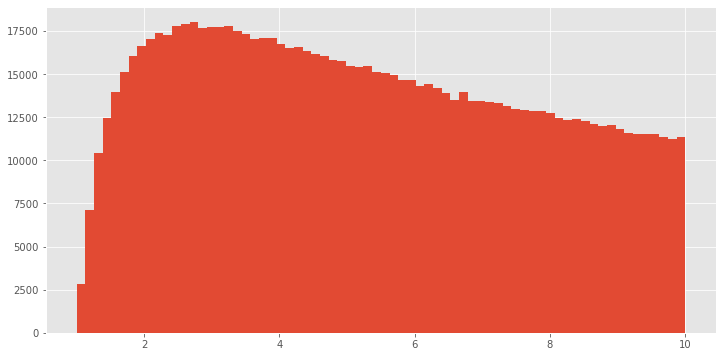

In [11]:
new_dist = np.exp(np.log(10) * np.sqrt(sample))

plt.hist(new_dist, bins=70);

In [12]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

theta = 10
alpha = 2

ans7 = new_dist.mean()

# your code here
ans7

5.292026594318855

Нарисуйте для получившегося распределения гистограмму. Найдите в аналитическом виде плотность распределения. Нанесите её на картинку с гистограммой. 

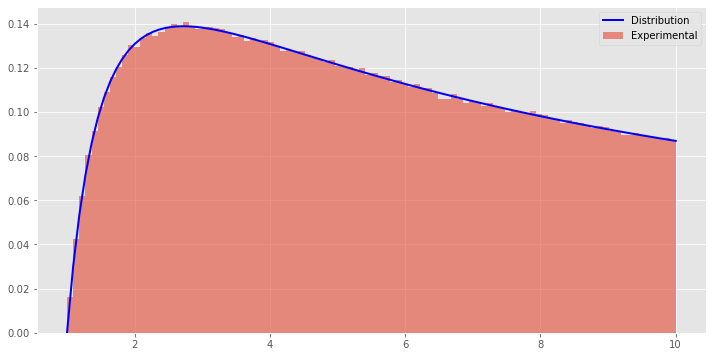

In [13]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
def pdf_dist(x):
    return 2 * np.log(x) / (x * (np.log(10)**2))
# your code here

x = np.linspace(1, 10, 100)
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(new_dist, bins=100, density=True, alpha=0.6, label='Experimental')
ax.plot(x, pdf_dist(x), lw=2, color='blue', label='Distribution')
plt.legend(loc='upper right');

In [14]:
# проверка, что задание решено корректно
assert ans7 < 6
assert ans7 > 2

# Похожие тесты скрыты от вас

## Упражнение 4 (сходимость по вероятности)

__Это задание никак не оценивается.__ У распределения хи-квадрат есть следующее свойство: если $X_1, \ldots, X_n \sim iid~N(0,1)$, тогда имеет место следующая сходимость по веротяности:

$$
\frac{\chi^2_n}{n} = \frac{X_1^2 + \ldots + X_n^2}{n} \to  1
$$

Продемонстрируйте с помощью симуляций, что это именно так. От вас требуется построить ту же картинку, что мы строили при иллюстрации ЗБЧ в лекции. Не забудьте построить для нескольких разных $\varepsilon$ коридоры и убедиться, что последовательность с некоторого момента начинает пробивать их довольно редко.

In [58]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
dist = sts.norm()
N = 10**6
sample = dist.rvs(size=N)
sample.shape

(1000000,)

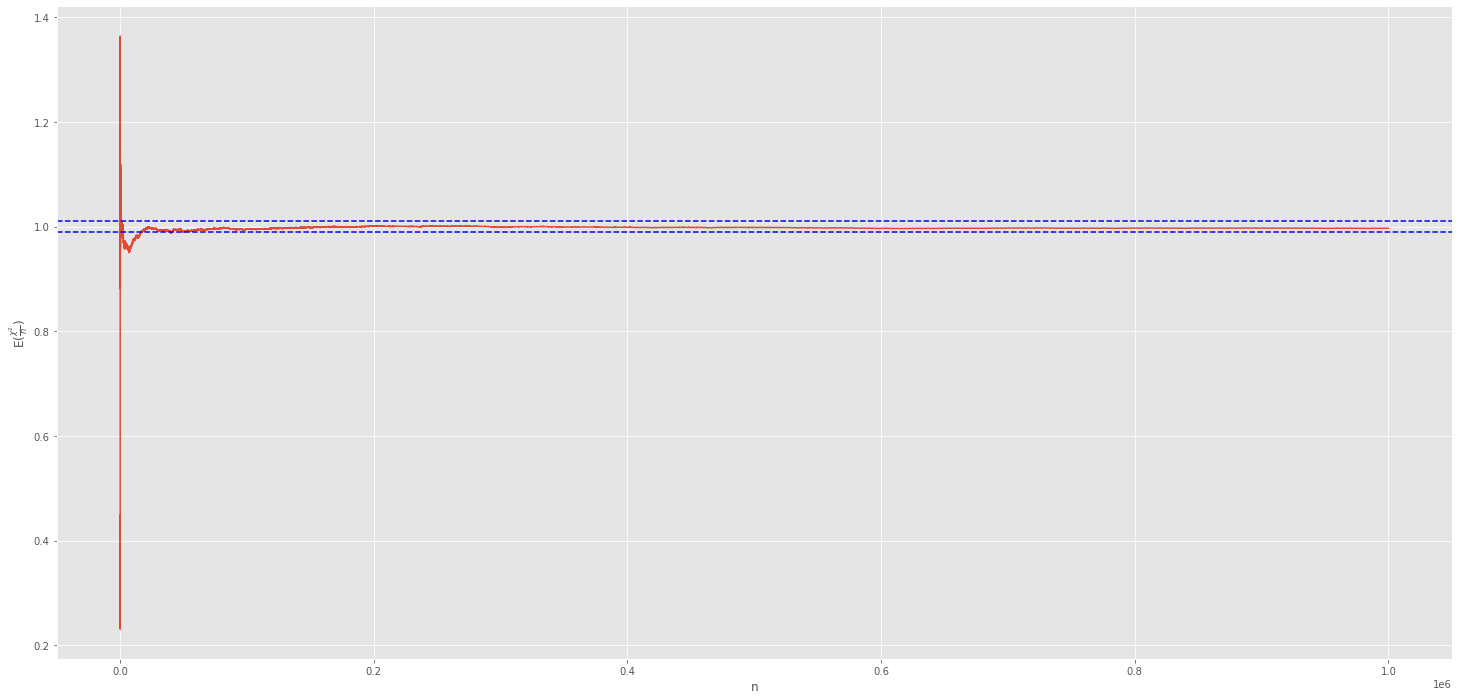

In [59]:
summed = np.cumsum(sample**2)
counted = np.arange(1, N+1)
chi2_n = summed / counted

eps = 0.01
plt.figure(figsize=(25, 12))
plt.plot(counted, chi2_n)
plt.axhline(1 - eps, ls='--', c='blue')
plt.axhline(1 + eps, ls='--', c='blue')
plt.xlabel('n')
plt.ylabel(r'E($\frac{\chi^2}{n}$)');

In [60]:
%%time
sample = dist.rvs(size=(100, N))
sample.shape

CPU times: user 3.69 s, sys: 405 ms, total: 4.1 s
Wall time: 8.14 s


(100, 1000000)

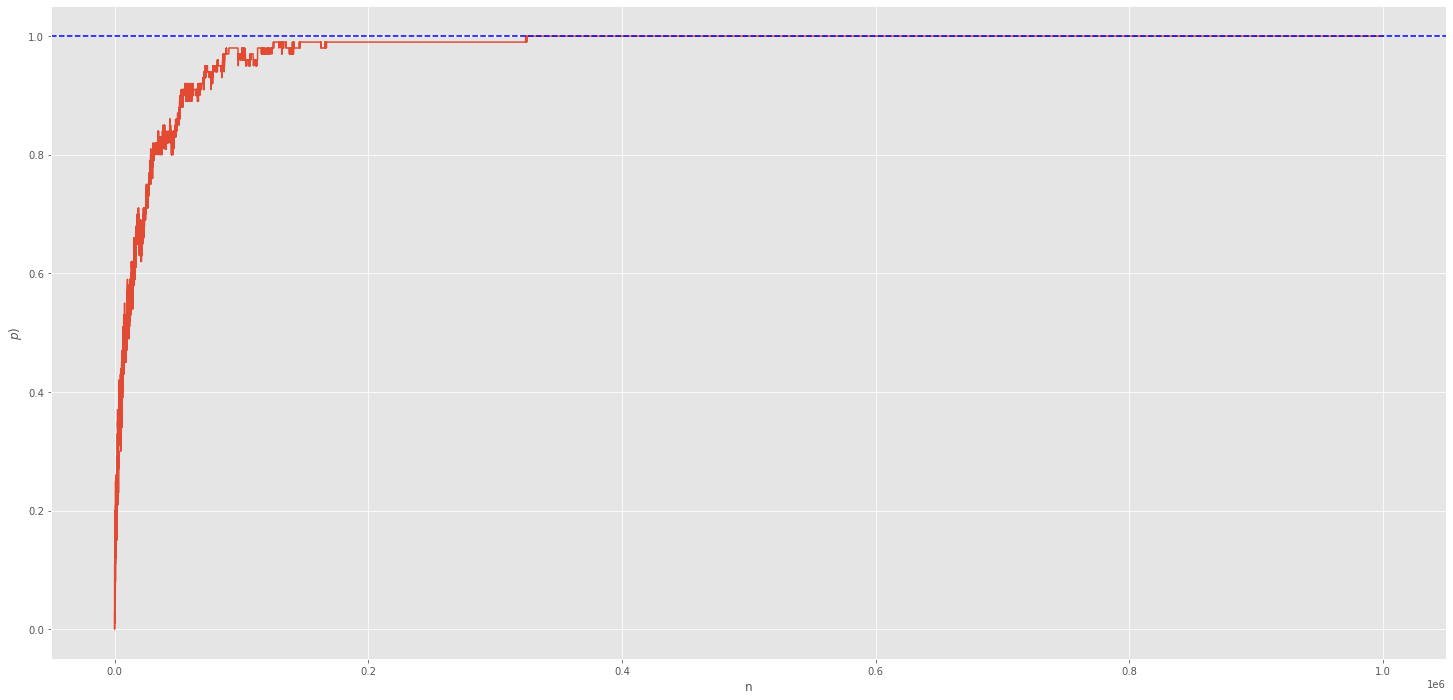

In [61]:
plt.figure(figsize=(25, 12))
plt.plot((np.abs((np.cumsum(sample**2, axis=1) / counted) - 1) < eps).mean(axis=0))
plt.axhline(1, ls='--', c='blue')
plt.xlabel('n')
plt.ylabel(r'$p$)');